# Drug Detection

We are going to follow this aproach

1. Problem Definition
2. Data
3. Evaluation
4. Feature
5. Modeling
6. Experiments


# 1. Problem Definition 

What problem do we have to solve?

# 2. Data 

#### We have drugs data in correlation with body parameters

# 4. Features

#### Input Data

1. Age - age of patient
2. Sex - sex of patient
3. BP - Blood Pressure
4. Cholestrol 
5. Na_to_K - Sodium To Potassium Level in blood

#### Output Data

6. Drug

In [10]:
"""
Import regular RDA and matplotlib libraries
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

"""
importing models
"""
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

"""
importing evaluation metrics
"""
from sklearn.metrics import (accuracy_score, f1_score,
                            roc_curve, classification_report, confusion_matrix)
from sklearn.model_selection import (train_test_split, RandomizedSearchCV,
                                    GridSearchCV, cross_val_score)

In [5]:
#importing data
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.shape

(200, 6)

In [6]:
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [7]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
pd.crosstab(df.Drug, df.Sex)

Sex,F,M
Drug,,
DrugY,47,44
drugA,9,14
drugB,6,10
drugC,7,9
drugX,27,27


In [12]:
corr_df = df.corr()
corr_df

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


<AxesSubplot:>

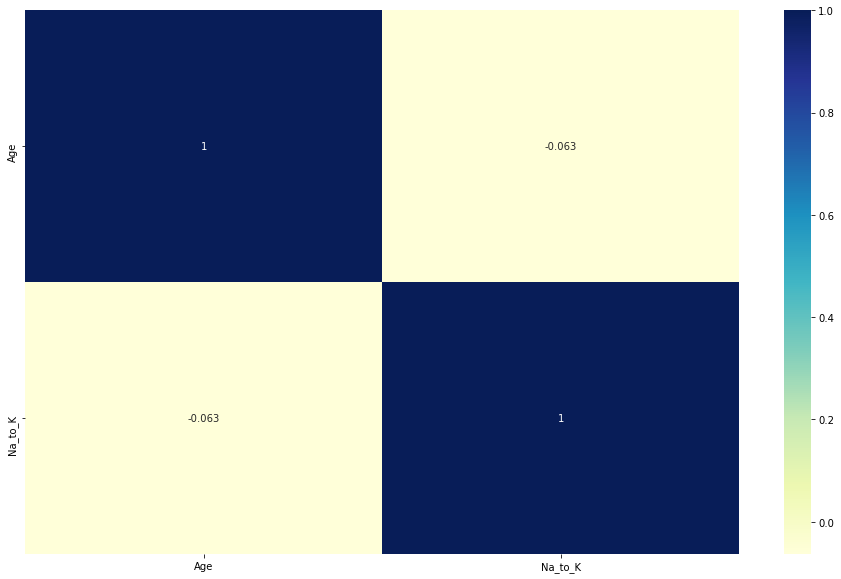

In [11]:
plt.figure(figsize=(16, 10))
sns.heatmap(corr_df, annot=True, cmap='YlGnBu')

In [13]:
## Let's Start Modeling Phase
"""
Creating a model
"""
X = df.drop('Drug', axis=1)
y = df.Drug

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
X_test.shape

(40, 5)

In [18]:
model = KNeighborsClassifier(n_neighbors=10,
                            algorithm='kd_tree',
                            leaf_size=10)

In [20]:
df.Sex = pd.Categorical(df.Sex)

In [28]:
pd.BP = pd.Categorical(df.BP)
pd.Cholesterol = pd.Categorical(df.Cholesterol)
pd.Drug = pd.Categorical(df.Drug)

In [35]:
# df['Sex'] = df.Sex.cat.codes
df['Cholesterol'] = df.Cholesterol.cat.codes
# df.BP = df.BP.cat.codes
# df.Drug = df.Drug.cat.codes

AttributeError: Can only use .cat accessor with a 'category' dtype

In [38]:
df.Cholesterol.dtype

dtype('O')

In [37]:
pd.Cholesterol = pd.Categorical(df.Cholesterol)